In [1]:
import heapq
import numpy as np

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
N_REPEAT = 10

A)

In [3]:
def experiment_A(n_windows, a):
    return [*np.zeros(n_windows), *np.sort(np.random.exponential(1 / a, n_windows))]

In [4]:
def task_A():
    ns_windows = [100, 1000, 10000]
    params_a = [1/3, 1, 2, 5]
    
    for n_windows in ns_windows:
        
        n_people = 2 * n_windows
        X = [i for i in range(1, n_people + 1)]
        
        fig, ax = plt.subplots(figsize=(15,8))
        
        for param_a in params_a:
            
            results = sum([np.array(experiment_A(n_windows, param_a)) for _ in range(N_REPEAT)]) / N_REPEAT
            
            ax.plot(X, results, label=f'a = {param_a}')
        
        plt.title('Two people per window')
        plt.xlabel('Position in a queue')
        plt.ylabel('Mean wait time')
        plt.legend()
        plt.show()
        

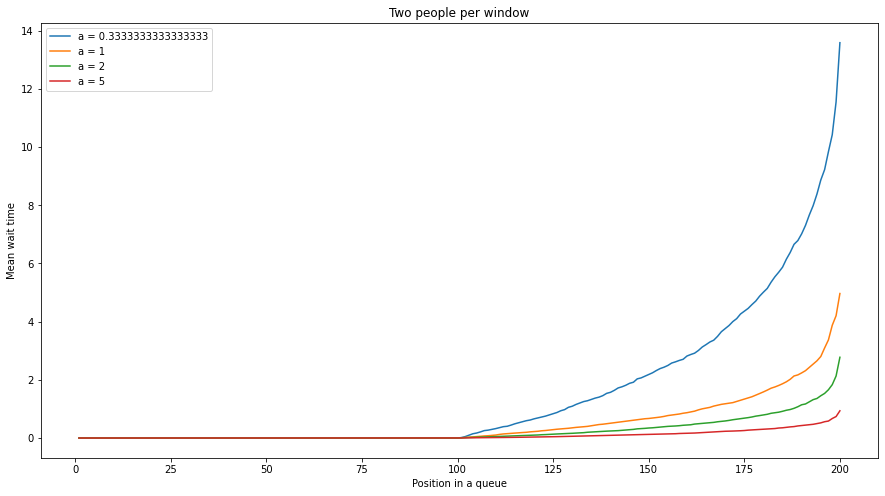

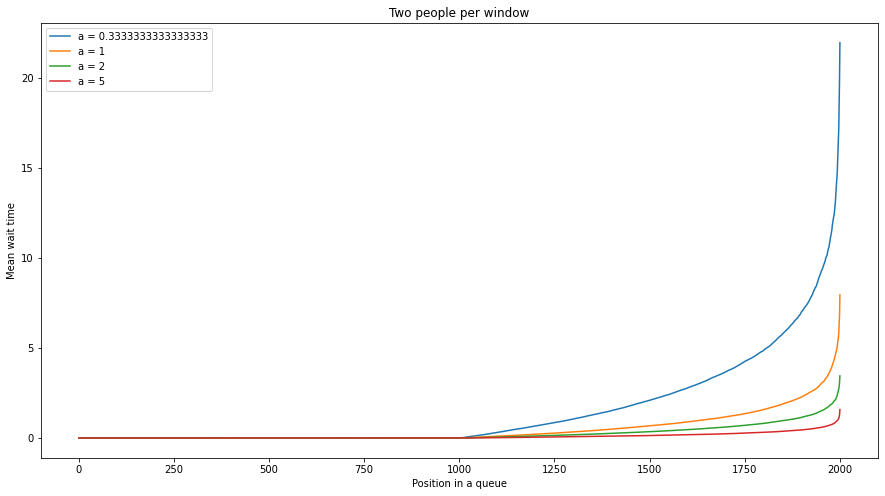

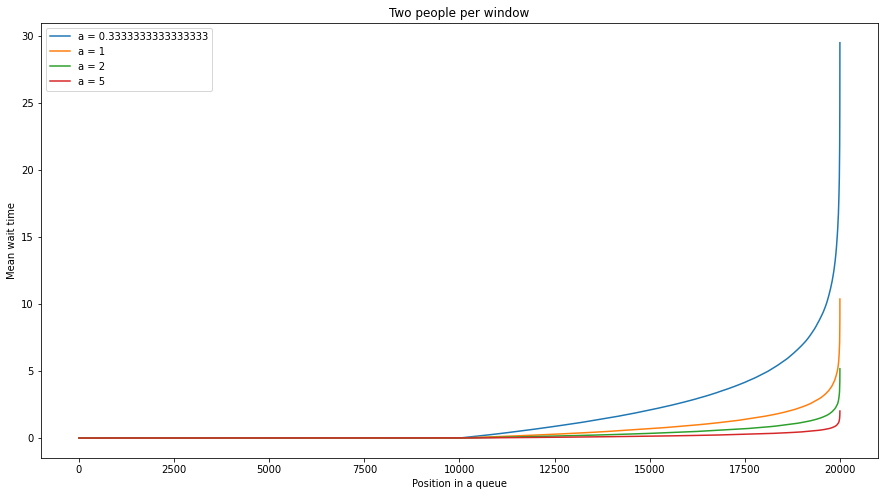

In [5]:
task_A()

Сразу учту : в numpy генерация экспоненциального распределения требует $1 / a$, где $a$ - параметр экспоненциального распределения.
Мои параметры $n$ - количество окон, $a$ - параметр экспоненциального распределения, $k$ - такой параметр, что кол-во людей для эксперимента $n*k$.
Я также учитываю тех $n$ людей, которые пришли, когда окна были свободны.

Мы с практики знаем, что 

$X_{(j+1)} - X_{(j)} \sim Exp((k \cdot n - j) \alpha)$ 

Сейчас у нас $k = 2$, а время ожидания начинает быть больше 0 с $j = n$, так что можно переобозначить $i = j - n$.

Тогда $k \cdot n - j = 2 \cdot n - n - i = n - i$

Тогда $X_{(i + n + 1)} - X_{(i + n)} \sim Exp((n - i) \alpha)$

Хотим найти $EX_{(y + n + 1)}$. Для начала найдем распределение:

$X_{(y + n + 1)} = (X_{(y + n + 1)} - X_{(y + n)}) + (X_{(y + n)} - X_{(y + n - 1)}) + \dots + (X_{(n + 1)} - X_{(n)}) \sim $

Мы тут остановились на $X_{n}$, так как первые $n$ человек сразу подходят к окошку, ничего не ждут, значит $X$ распределен уже не экспоненциально, просто константа. 

$ \sim Exp((n - y) \alpha) + Exp((n - y + 1) \alpha) + \dots + Exp(n \cdot \alpha) $

Тогда 

$EX_{(y + n + 1)} = E(Exp((n - y) \alpha) + Exp((n - y + 1) \alpha) + \dots + Exp(n \cdot \alpha)) =$ 

$= E(Exp((n - y) \alpha)) + E(Exp((n - y + 1) \alpha)) + \dots + E(Exp(n \cdot \alpha)) =$

$= \frac{1}{(n - y) \alpha} + \frac{1}{(n - y + 1) \alpha} + \dots + \frac{1}{n \alpha}$

In [6]:
def get_max_difference_A():
    n_windows = 1000
    param_a = 2
    results = (sum([np.array(experiment_A(n_windows, param_a)) for _ in range(1000)]) / 1000)[n_windows:]
    
    estimated_results = np.array([sum([1 / (param_a * (n_windows - j)) for j in range(i)]) for i in range(1, n_windows + 1)])
    
    return max(results - estimated_results)

In [7]:
get_max_difference_A()

0.005428627963285582

Убедились, что реальное значение от оценки почти не отличаются.




B)

In [8]:
def experiment_B(n_windows, a, n_people):
    v = list(np.sort(np.random.exponential(1 / a, n_windows)))
    heapq.heapify(v)
    
    current_time = 0
        
    result = [0] * n_windows
    for _ in range(n_windows, n_people):
        current_time = heapq.heappop(v)
        result.append(current_time)
        
        heapq.heappush(v, current_time + np.random.exponential(1 / a))
    
    return result

In [9]:
def task_B():
    ns_windows = [100, 1000, 10000]
    window_modifiers = [5, 10, 20] 
    params_a = [1/3, 1, 2]
    
    for n_windows in ns_windows:
        
        fig, axs = plt.subplots(ncols=3, figsize=(20,4))
        
        for i, window_modifier in enumerate(window_modifiers):
            
            n_people = window_modifier * n_windows
            
            X = [i for i in range(1, n_people + 1)]
                
            for param_a in params_a:
            
                results = sum([np.array(experiment_B(n_windows, param_a, n_people)) for _ in range(N_REPEAT)]) / N_REPEAT
            
                axs[i].plot(X, results, label=f'a = {param_a}')
                axs[i].set_title('Any people per window')
                axs[i].set_xlabel('Position in a queue')
                axs[i].set_ylabel('Mean wait time')
        
        plt.legend()
        plt.show()    
        

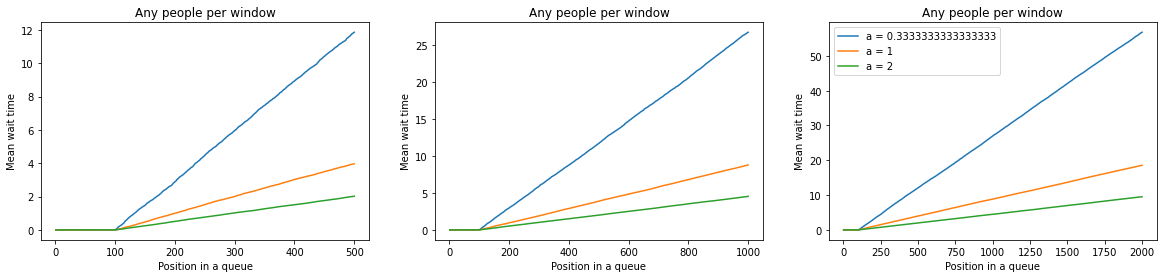

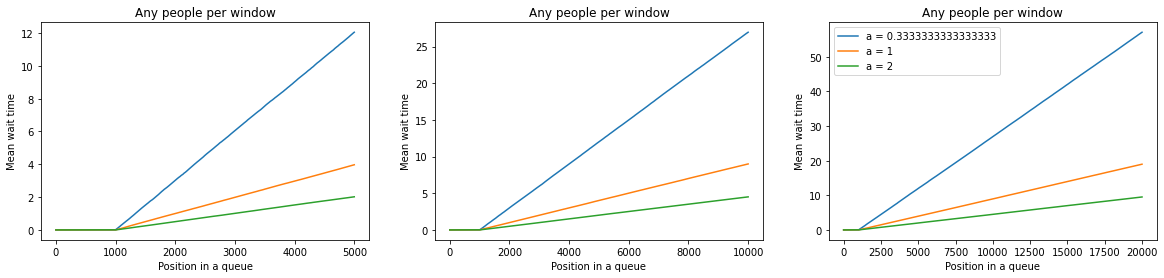

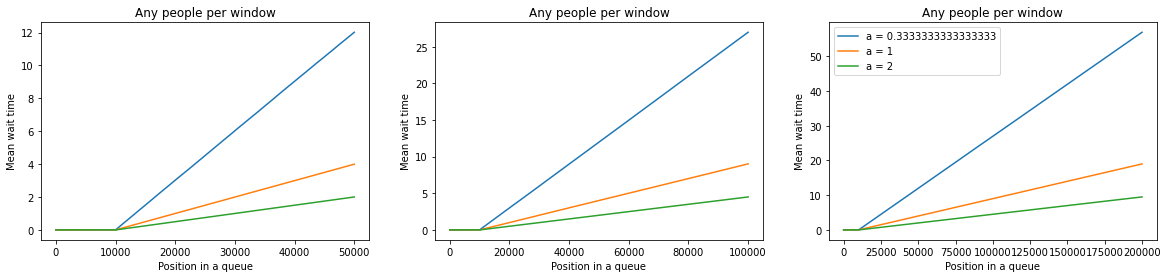

In [10]:
task_B()

Графики - прямые линии, можно выдвинуть гипотезу, что  $EX_{(i + n)} = \frac{i}{\alpha \cdot n}$, где $i > 0$. Все графики зрительно удовлетворяют этому равенству.

In [11]:
def get_max_difference_B():
    n_windows = 1000
    param_a = 2
    n_people = 10 * n_windows
    results = (sum([np.array(experiment_B(n_windows, param_a, n_people)) for _ in range(N_REPEAT)]) / N_REPEAT)[n_windows:]
    
    estimated_results = np.array([(i - n_windows) / (param_a * n_windows) for i in range(1 + n_windows, n_people + 1)])
    
    return max(results - estimated_results)

In [12]:
get_max_difference_B()

0.03708128797496135